In [1]:
# 영화 댓글 긍정/부정 찾기

import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import chardet

with open('./data/imdb_master.csv', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('./data/imdb_master.csv', encoding=result['encoding'])
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [5]:
# 원본데이터 보호를 위한 copy 진행

train = df.copy()
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [6]:
train.shape

(100000, 5)

In [8]:
# 불필요한 열 제거

train.drop(train.columns[[0,1,4]],axis=1).head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [9]:
train = train.drop(train.columns[[0,1,4]],axis=1)

In [11]:
train.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [12]:
train = train[train['label'] != 'unsup'] # see only pos/neg
train['label'].value_counts() # updated df

neg    25000
pos    25000
Name: label, dtype: int64

In [13]:
train.shape, train

((50000, 2),
                                                   review label
 0      Once again Mr. Costner has dragged out a movie...   neg
 1      This is an example of why the majority of acti...   neg
 2      First of all I hate those moronic rappers, who...   neg
 3      Not even the Beatles could write songs everyon...   neg
 4      Brass pictures (movies is not a fitting word f...   neg
 ...                                                  ...   ...
 49995  Seeing as the vote average was pretty low, and...   pos
 49996  The plot had some wretched, unbelievable twist...   pos
 49997  I am amazed at how this movie(and most others ...   pos
 49998  A Christmas Together actually came before my t...   pos
 49999  Working-class romantic drama from director Mar...   pos
 
 [50000 rows x 2 columns])

In [14]:
# neg = 0, pos = 1 변환 (정수 인코딩)

train.label = [(l!='neg')*1 for l in train.label]

In [16]:
train.label.value_counts()

0    25000
1    25000
Name: label, dtype: int64

In [17]:
# 컬럼명 재 셋팅

d = train
print(d.columns)
d.columns = ['user_review', 'positive']
d.head()

Index(['review', 'label'], dtype='object')


,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [19]:
d.shape

(50000, 2)

In [21]:
# 훈련용 셋, 테스트 셋 분리 (7:3)

split = 0.7
d_train = d.sample(n= int(split*len(d)))
d_test = d.drop(d_train.index)

In [22]:
d_train.shape

(35000, 2)

In [23]:
d_train.head()

,user_review,positive
12478,"As a semi-film buff, I had heard of this infam...",0
37353,This movie had a IMDB rating of 8.1 so I expec...,0
44002,Police story brought Hong Kong movies to moder...,1
39381,Chris Rock stars in this remake of Warren Beat...,1
656,I had the misfortune to watch this last night ...,0


In [24]:
print(d_test.shape)
d_test.head()

(15000, 2)


,user_review,positive
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
6,This German horror film has to be one of the w...,0


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer() # 함수의 변수화
feature = vectorize.fit_transform(d_train.user_review)
feature

<35000x89053 sparse matrix of type '<class 'numpy.int64'>'
	with 4777331 stored elements in Compressed Sparse Row format>

In [26]:
len(vectorize.get_feature_names()), #vectorize.get_feature_names()

(89053,)

In [27]:
# 3만건에서 100번째 칸까지 확인하기

i = 30000
j = 100

words = vectorize.get_feature_names()[i:i+30]
pd.DataFrame(feature[j:j+10, i:i+30].todense(), columns=words) 

,foal,foals,foam,foaming,foams,fob,fobby,fobh,fobidden,fobs,...,focusses,focussing,focusâ,fod,fodder,foe,foer,foes,foetus,fof
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
words

['foal',
 'foals',
 'foam',
 'foaming',
 'foams',
 'fob',
 'fobby',
 'fobh',
 'fobidden',
 'fobs',
 'focal',
 'focalize',
 'foch',
 'fockers',
 'focus',
 'focus_id',
 'focused',
 'focuses',
 'focusing',
 'focussed',
 'focusses',
 'focussing',
 'focusâ',
 'fod',
 'fodder',
 'foe',
 'foer',
 'foes',
 'foetus',
 'fof']

### 모델링

In [29]:
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()
model1.fit(feature, d_train.positive) # 학습
# features: countervectorizer 값(frequency 값)

MultinomialNB()

In [30]:
pred1 = model1.predict_proba(vectorize.transform(d_test.user_review)) # 예측한 feature값 출력
pred1

array([[1.00000000e+00, 1.14785696e-12],
       [1.00000000e+00, 9.58373654e-13],
       [9.99995892e-01, 4.10775802e-06],
       ...,
       [2.30251389e-07, 9.99999770e-01],
       [2.10362113e-09, 9.99999998e-01],
       [9.89216116e-01, 1.07838842e-02]])

In [31]:
model1.predict(vectorize.transform(d_test.user_review))

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
# 결과해석
#  neg = 0, pos = 1(두 개 합치면 1)

In [32]:
pred1.shape

(15000, 2)

In [33]:
# 평가하기
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [34]:
def performance(y_true, pred, color='blue', ann=True):
    acc = accuracy_score(y_true, pred[:,1]>0.5) # 긍정일 확률(0.5보다 큰지 확인)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth='3')
    xlabel('False Positive Rate')
    ylabel('True Positive Rate')
    if ann:
        annotate('Acc : %0.2f'%acc, (0.1,0.8), size=14)
        annotate('Auc : %0.2f'%auc, (0.1,0.7), size=14)

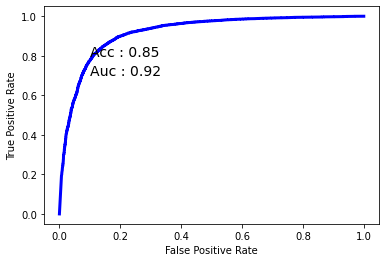

In [35]:
performance(d_test.positive, pred1)